# Exercise 12: Question 1

### Description of dataset - chickwts.txt

The dataset describes attributes of chicks. The first column contatins "weights", which is a numeric variable. The second column is "feed", which is a character string describing the type of feed given to the chick. There are 72 observations.


In [12]:
# Read in the data
import pandas 
chData=pandas.read_csv('chickwts.txt')
# Look at the first 5 observations 
chData.head()

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


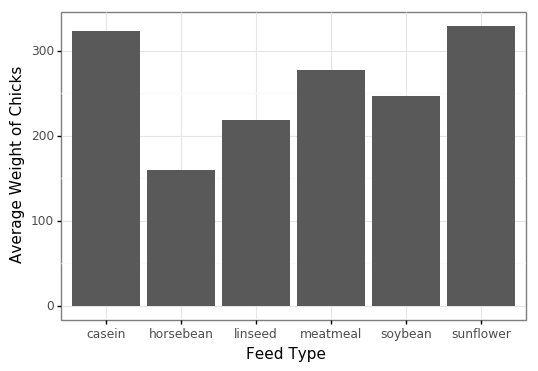

<ggplot: (292029437)>

In [13]:
# Plot the data
from plotnine import *
import numpy
plot1=ggplot(chData, aes(y="weight", x="feed"))+geom_bar(stat= "summary", fun_y=numpy.mean)
plot1+theme_bw()+xlab("Feed Type")+ylab("Average Weight of Chicks")

### Null Hypothesis: 
There is no difference in the average weight of chicks fed either soybean or sunflower seef.

### Alternative Hypothesis:
Chicks fed sunflower seed are heavier than chicks fed soybean feed.


### Testing our Hypotheses:
To test our hypotheses, we will use a likelihood ratio test. But first, we need to get the data in the appropriate formats.

In [14]:
# Load all the libraries we need
import re
import scipy
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import chi2

# Subset data to only include chicks fed with soybean or sunflower
ssData=chData.loc[(chData.feed == "soybean") | (chData.feed == "sunflower")]
# Name columns
ssData.columns=['y', 'x']
# Set sunfeed = 1 and soybean = 0
ssData['x'] = ssData['x'].map({'soybean': 0, 'sunflower': 1})
# Look at the data
ssData.head()


/Users/brittnibertolet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,y,x
22,243,0
23,230,0
24,248,0
25,327,0
26,329,0


Now we need to write the likelihood functions, estimate parameters, and perform the likelihood ratio test.

In [15]:
# Define likelihood function for the null hypothesis
def null(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll
# Estimate parameters for null model
nullguess=numpy.array([1,1]) # Set intial guesses
null_fit=minimize(null,nullguess,method="Nelder-Mead",options={'disp':True},args=ssData)

# Define likelihood function for the alternative hypothese
def alt(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expected=B0+B1*obs.x
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll

# Estimate parameters for null model
altguess=numpy.array([1,1,1]) # Set intial guesses
alt_fit=minimize(alt,altguess,method="Nelder-Mead",options={'disp':True},args=ssData)


# Perform likelihood ratio test
D=2*(null_fit.fun-alt_fit.fun) #calculate the different in negative log likelihood
1-scipy.stats.chi2.cdf(x=D,df=1) #test for statistical significance


Optimization terminated successfully.
         Current function value: 145.240592
         Iterations: 85
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 138.469162
         Iterations: 200
         Function evaluations: 363


0.00023317672869549444

### **The tests shows that the alternative hypothesis should be accepted! Chicks fed with sunflower feed are significantly heavier than those fed with soybean.** 